### II ) -- Projet analyse des données immobilière, statistique --

L'objectif du projet est de récupérer des données sur le prix de l'immobilier 
pour afficher l'évolution de son prix par jour ou par mois.

En python chargement des librairies

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import re
import csv
from datetime import datetime

date = datetime.now().strftime('%Y/%m/%d')


Afficher les données

In [2]:
df_immo= pd.read_csv('rendu_csv/immo_figaro.csv')
df_immo.head()

,Ville,Type de bien,Prix
0,Paris 10ème,appartement,247000
1,Paris 2ème,appartement,331000
2,Mougins,maison,1950000
3,Vitre,maison,351080
4,Domagné,maison,367500


In [3]:
df_immo.dtypes

Ville           object
Type de bien    object
Prix            object
dtype: object

Vérifie si la colonne des prix est de type int

In [4]:
l_prix = []
for prix in df_immo.Prix:
    if prix.isdigit():
        in_prix = int(prix)
        l_prix.append(in_prix)
    else:
        pass

Imprime [ la moyenne, mode median ] du prix de l'immobilier

In [5]:
moyen = np.mean(l_prix)
print("Le prix moyen du logement est de :", round(moyen, 2), "€" ) 

mode = st.mode(l_prix)
print("Le mode est de : " , mode,"€")

median = st.median(l_prix)
print("Le prix médian est de :", median, "€")


Le prix moyen du logement est de : 509211.36 €
Le mode est de :  299000 €
Le prix médian est de : 312000 €


Ecrit les données dans un fichier local CSV

In [6]:
with open('calcul_median/calcul_median.csv','a',newline='', encoding='utf-8') as fichier_csv:
    #writer = csv.DictWriter(fichier_csv, fieldnames = ["Date", "Prix_median"], delimiter = ';')
    #writer.writeheader()

    writer=csv.writer(fichier_csv)
    writer.writerow([date, median])
fichier_csv.close()

----------

In [7]:
df_immo.head(5)

,Ville,Type de bien,Prix
0,Paris 10ème,appartement,247000
1,Paris 2ème,appartement,331000
2,Mougins,maison,1950000
3,Vitre,maison,351080
4,Domagné,maison,367500


#### Filtre le type de bien

In [8]:
filtre_maison = df_immo[df_immo["Type de bien"] == "maison" ]

In [9]:
l_prix_maison= []
for prix in filtre_maison.Prix:
    if prix.isdigit():
        in_prix = int(prix)
        l_prix_maison.append(in_prix)
    else:
        pass


print("Nombre de données de la catégorie maison: ", len(l_prix_maison))


Nombre de données de la catégorie maison:  1396


#### affiche la moyenne , le mode, la médian des prix des maisons

In [10]:
moyen_maison = np.mean(l_prix_maison)

print("Le prix moyen du logement est de type maison :", round(moyen_maison, 2), "€" ) 

mode_maison = st.mode(l_prix_maison)
print("Le mode est de : " , mode_maison,"€")

median_maison = st.median(l_prix_maison)
print("Le prix médian est de :", median_maison, "€")

Le prix moyen du logement est de type maison : 423304.76 €
Le mode est de :  265000 €
Le prix médian est de : 297900.0 €


-----

#### Ajoute le prix médian des maison

In [11]:
with open('calcul_median/prix_median_maison.csv','a',newline='', encoding='utf-8') as f_csv:
    #writer = csv.DictWriter(f_csv, fieldnames = ["Date", "Prix_median_maison"], delimiter = ';')
    #writer.writeheader()

    writer=csv.writer(f_csv)
    writer.writerow([date, median_maison])
f_csv.close()

Graphique par jour.

In [12]:

df_time_immo = pd.read_csv("calcul_median/prix_median_maison.csv", sep=",")
df_time_immo.tail()

,Date,Prix_median_maison
118,2023/06/10,283500.0
119,2023/06/11,331950.0
120,2023/06/12,289950.0
121,2023/06/14,299000.0
122,2023/06/16,297900.0


Text(0.5, 1.0, 'Evolution du prix des maisons ( depuis le 5 novembre 2022 )')

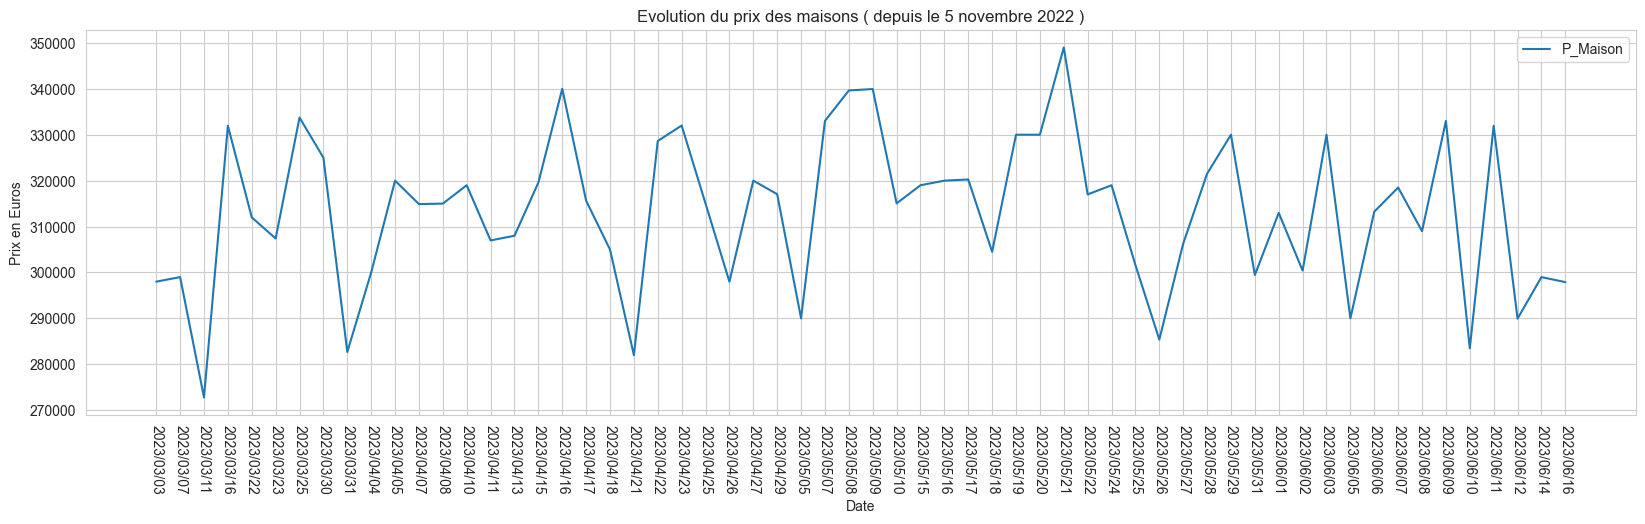

In [13]:
sns.set_style("whitegrid")
l = 20
h = 5

filte_graph = df_time_immo.tail(60)

plt.figure(figsize = (l,h))
sns.lineplot(data= filte_graph,
                x = 'Date', 
                y = 'Prix_median_maison', )

plt.xticks(rotation=-90)

plt.legend(labels=["P_Maison"])
plt.xlabel("Date")
plt.ylabel("Prix en Euros")
plt.title('Evolution du prix des maisons ( depuis le 5 novembre 2022 )' )

Filtre graphique par mois

In [14]:

# Besoin de separer le mois et l'année  pour filtrer
df_time_immo[["Annee", "Mois", "Jour"]] = df_time_immo["Date"].str.split("/", expand = True)
# Besoin de concater la colonne annee et moi pour filtrer
df_time_immo['Date_concat'] = df_time_immo['Annee'].str.cat(df_time_immo['Mois'], sep='/')

mois_data_time = df_time_immo.groupby(by=["Date_concat"])['Prix_median_maison'].mean()

Graphique par mois.

Text(0.5, 1.0, 'Evolution du prix des maisons par mois ( depuis le 5 novembre 2022 )')

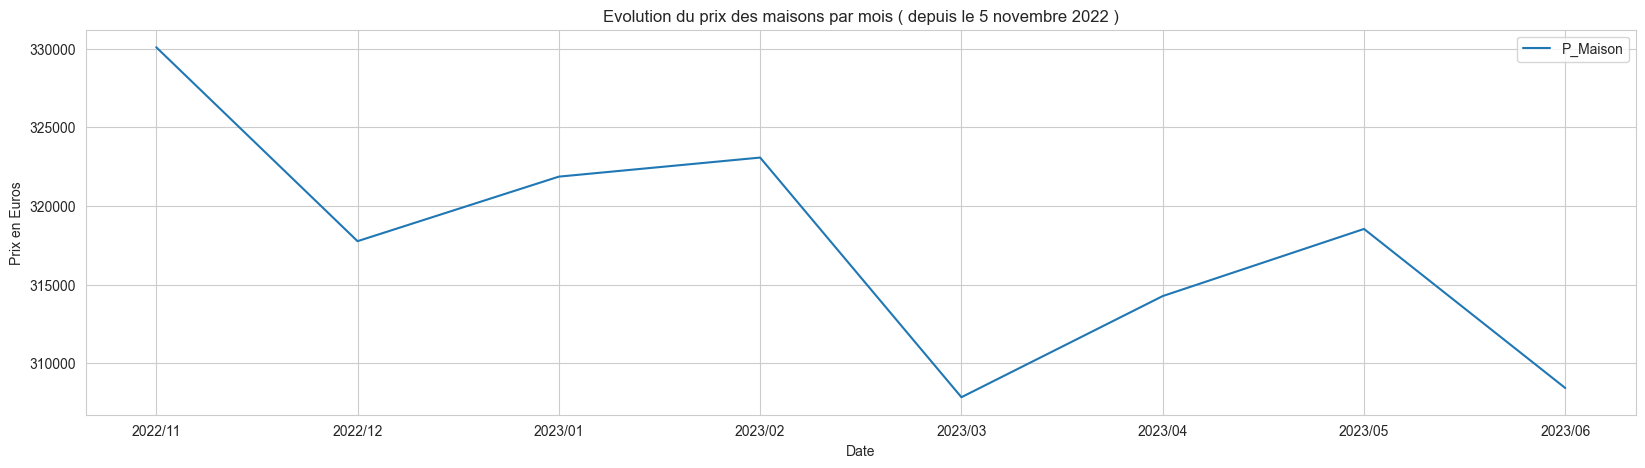

In [17]:
sns.set_style("whitegrid")
l = 20
h = 5

plt.figure(figsize = (l,h))
sns.lineplot(data= mois_data_time )

#plt.xticks(rotation=-90)


plt.legend(labels=["P_Maison"])
plt.xlabel("Date")
plt.ylabel("Prix en Euros")
plt.title('Evolution du prix des maisons par mois ( depuis le 5 novembre 2022 )' )

_________

#### ----------------- FIN -----------------